# 八、KNN(K Nearest Neighbor Algorithm)

## 1.算法简述

KNN算法是最简单的一种分类算法，其模型就是其样本数据本身，无需训练，只需在测试时寻找K近邻样本点，然后多数决议，决定预测点的类别。

1. 找k近邻
2. 根据k近邻最多的类别进行预测

KNN算法有3个点需要确定：

1. k的选择，elbow 算法，根据可视化观测等

2. 度量选择，一般用欧氏距离，还有曼哈顿距离，闵可夫斯基距离

3. 分类决策规则：一般用多数决议规则

     

## 2. python实现

这个算法其实难点在于找k进邻，那么有暴力法，KD树，球树法等。这里提供from scratch的暴力法，其他方法就调用sklearn里的方法了

### 2.1 KNN in Bruct Force

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class Knn:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y, k):
        """_summary_

        Args:
            X (ndarray): m*n 
            y (ndarray): (m, )
        """
        self.X_train = X
        self.y_train = y
        
    
    def predict(self, X_test):
        # find k nearest neighbor index in training dataset
        dists = np.linalg.norm(np.expand_dims(X_test, axis=1) - np.expand_dims(self.X_train, axis=0), axis=2) # m_test * m_train
        knn_index = np.argsort(dists, axis=1)[:, :self.k] # m_test * k
        m_test = X_test.shape[0]
        y_pred = np.empty(m_test)
        for i in range(m_test):
            y_pred[i] = np.argmax(np.bincount(np.squeeze(self.y_train[knn_index[i]])))
        return y_pred   

    

### 2.2一个实例

[1. 0. 1. 0.]


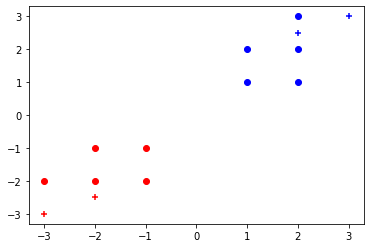

In [23]:
from turtle import color


X = np.array([
    [1, 1],
    [2, 2],
    [1, 2],
    [2, 3],
    [2, 1],
    [-1, -1],
    [-2, -2],
    [-2, -1],
    [-1, -2],
    [-3, -2],
])
y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=np.int8)
pos_data = X[y==1]
neg_data = X[y==0]

plt.scatter(pos_data[:, 0], pos_data[:, 1], marker='o', color='b')
plt.scatter(neg_data[:, 0], neg_data[:, 1], marker='o', color='r')


knn = Knn(k=2)
knn.fit(X, y, 2)
X_test = np.array([
    [2, 2.5],
    [-2, -2.5],
    [3, 3],
    [-3, -3],
])
y_test = knn.predict(X_test)
print(y_test)

X_test_pos = X_test[y_test==1]
X_test_neg = X_test[y_test==0]
plt.scatter(X_test_pos[:, 0], X_test_pos[:, 1], marker='+', color='b')
plt.scatter(X_test_neg[:, 0], X_test_neg[:, 1], marker='+', color='r')
plt.show()

### 2.3 sklearn实现

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_sklearn = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_sklearn.fit(X, y)
print(knn_sklearn.predict(X_test))

[1 0 1 0]
